In [36]:
import gbdt
from sklearn import metrics

In [37]:
def ComputeAUC(forest, data, targets):
    predictions = forest.predict(data)
    fpr, tpr, _ = metrics.roc_curve(targets, predictions, pos_label=1)
    return metrics.auc(fpr, tpr)

In [64]:
config = {'loss_func': 'logloss',
          'num_trees': 100,
          'num_leaves': 12,
          'example_sampling_rate': 0.5,
          'feature_sampling_rate': 0.8,
          'pair_sampling_rate': 20,
          'min_hessian': 50,
          'shrinkage' : 0.05}

In [3]:
float_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [4]:
cat_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [5]:
target_column = 'target'

In [11]:
training_data = gbdt.DataLoader.from_tsvs(tsvs=['train.tsv'],
                                          bucketized_float_cols=float_features,
                                          string_cols=cat_features + [target_column])
training_targets = list(map(lambda x: 1 if x=='>50K' else -1, training_data[target_column]))

In [20]:
testing_data = gbdt.DataLoader.from_tsvs(tsvs=['test.tsv'],
                                          bucketized_float_cols=float_features,
                                          string_cols=cat_features + [target_column])
testing_targets = list(map(lambda x: 1 if x=='>50K' else -1, testing_data[target_column]))

In [59]:
forest = gbdt.train(training_data,
                    y=training_targets,
                    features=float_features + cat_features,
                    config=config)

In [51]:
print ("Training AUC =", ComputeAUC(forest, training_data, training_targets))
print ("Testing AUC =", ComputeAUC(forest, testing_data, testing_targets))

Training AUC = 0.9009533609741178
Testing AUC = 0.9004807317342954


In [30]:
forest.feature_importance()

[('relationship', 1.0),
 ('capital-gain', 0.4265712373513121),
 ('education-num', 0.32238279670025854),
 ('marital-status', 0.26212321644195424),
 ('occupation', 0.24867333741189235),
 ('age', 0.09858779167011551),
 ('education', 0.06676247412953563),
 ('hours-per-week', 0.06573090692452374),
 ('capital-loss', 0.04071029240447739),
 ('workclass', 0.007963144077638635),
 ('sex', 0.004671242301806335),
 ('native-country', 0.0018770150737330326)]

In [60]:
visualizer = gbdt.ForestVisualizer(forest)

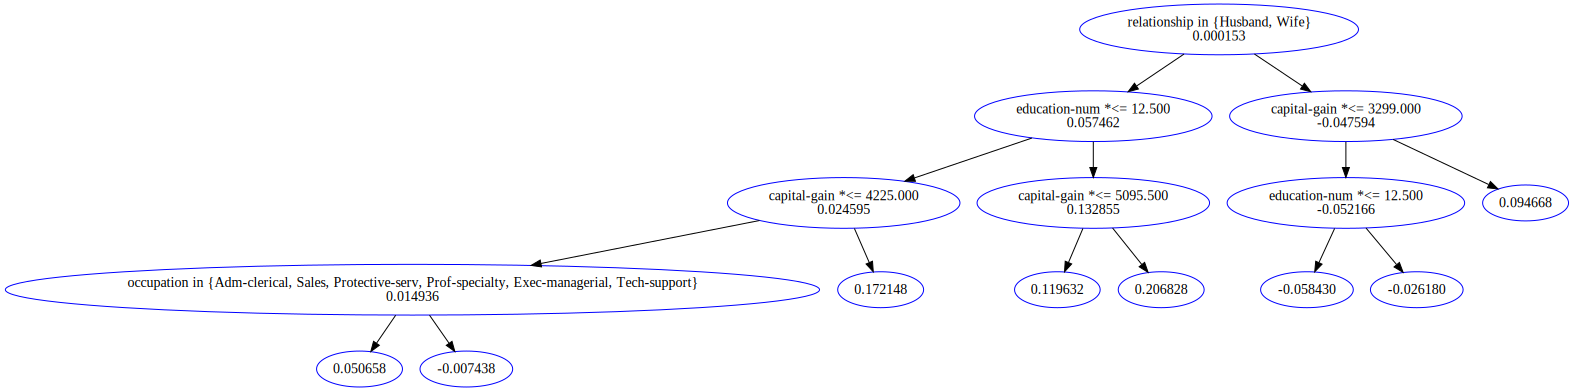

In [63]:
visualizer.visualize_tree(1)